# Proyecto: revisión de los crímenes […]


Para este proyecto se utilizó la base de datos de los crímenes ocurridos en Chicago de 2001 a 2017 [Crimes in Chicago](https://www.kaggle.com/currie32/crimes-in-chicago/version/1?select=Chicago_Crimes_2012_to_2017.csv) y el shapefile de [Mapa de los distritos de Chicago](https://data.cityofchicago.org/Public-Safety/Boundaries-Police-Beats-current-/aerh-rz74)

https://data.cityofchicago.org/Public-Safety/Crimes-2001-to-Present/ijzp-q8t2 (segunda fuente)

Los datos usados son registros oficiales proporcionados por parte del cuerpo policial de la ciudad de Chicago, Illinois. En ellos se recabó cierta información tal como la fecha (Date), locación (Block, Location Description, District, Latitude, Longitude, Location) y una descripción del crimen cometido (Primary Type, Description, Arrest). Como no resulta ser una red sino una base de datos podemos analizar de distintas formas los datos elegidos, no obstante, una constante en cualquier análisis será siempre que __cada nodo corresponderá a un crimen reportado ante las autoridades de Chicago__

## Datos

Comenzaremos leyendo y observando los datos que podremos usar para los análisis.

In [14]:
import pandas as pd

En primera instancia podemos seleccionar distintos tipos de relaciones según las columnas que elijamos, puede ser por el tipo del crimen o por la ubicación o si fue arrestado el criminal.

In [20]:
pd.read_csv('Chicago Crimes/Chicago_Crimes_2001_to_2004.csv', nrows = 10,sep = ',').columns

Index(['Unnamed: 0', 'ID', 'Case Number', 'Date', 'Block', 'IUCR',
       'Primary Type', 'Description', 'Location Description', 'Arrest',
       'Domestic', 'Beat', 'District', 'Ward', 'Community Area', 'FBI Code',
       'X Coordinate', 'Y Coordinate', 'Year', 'Updated On', 'Latitude',
       'Longitude', 'Location'],
      dtype='object')

In [99]:
pd.read_csv('Chicago Crimes/Chicago_Crimes_2001_to_2004.csv',
            #nrows = 10,
            sep = ',',
            usecols = ['Primary Type','Year','Latitude', 'Longitude', 'Location']
           ).dropna()

/Users/robledito/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3437: DtypeWarning: Columns (18,20,21) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Primary Type,Year,Latitude,Longitude,Location
1,OTHER OFFENSE,2003,41.817229,-87.637328,"(41.817229156, -87.637328162)"
4,THEFT,2003,41.691785,-87.635116,"(41.691784636, -87.635115968)"
6,CRIM SEXUAL ASSAULT,2001,41.68702,-87.608445,"(41.687020002, -87.60844523)"
7,OTHER OFFENSE,2003,41.729712,-87.653159,"(41.729712374, -87.653158513)"
9,THEFT,2003,41.869772,-87.70818,"(41.869772159, -87.708180162)"
...,...,...,...,...,...
1923511,THEFT,2001,41.922997,-87.757492,"(41.922996623, -87.757491503)"
1923512,THEFT,2003,41.963134,-87.784457,"(41.963133955, -87.784456675)"
1923513,THEFT,2002,41.743865,-87.674464,"(41.743865444, -87.674463733)"
1923514,BURGLARY,2001,41.736343,-87.555413,"(41.736342659, -87.555413094)"


In [21]:
import osmnx as ox
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd

In [24]:
street_map = gpd.read_file('Mapa Chicago/Chicago_city.shp') 

In [106]:
df = pd.read_csv('Chicago Crimes/Chicago_Crimes_2001_to_2004.csv',
            #nrows = 10,
            sep = ',',
            usecols = ['Year','Latitude', 'Longitude']
           ).dropna()

df = df.reset_index().drop('index', axis = 1).drop(1490029)
df = df[pd.to_numeric(df['Latitude']) > 41]          # Corrección de un dato
#df = df[df['Year'] == 2003]


geo_df = gpd.GeoDataFrame(zip(df['Longitude'],df['Latitude']))

/Users/robledito/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3437: DtypeWarning: Columns (18,20,21) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


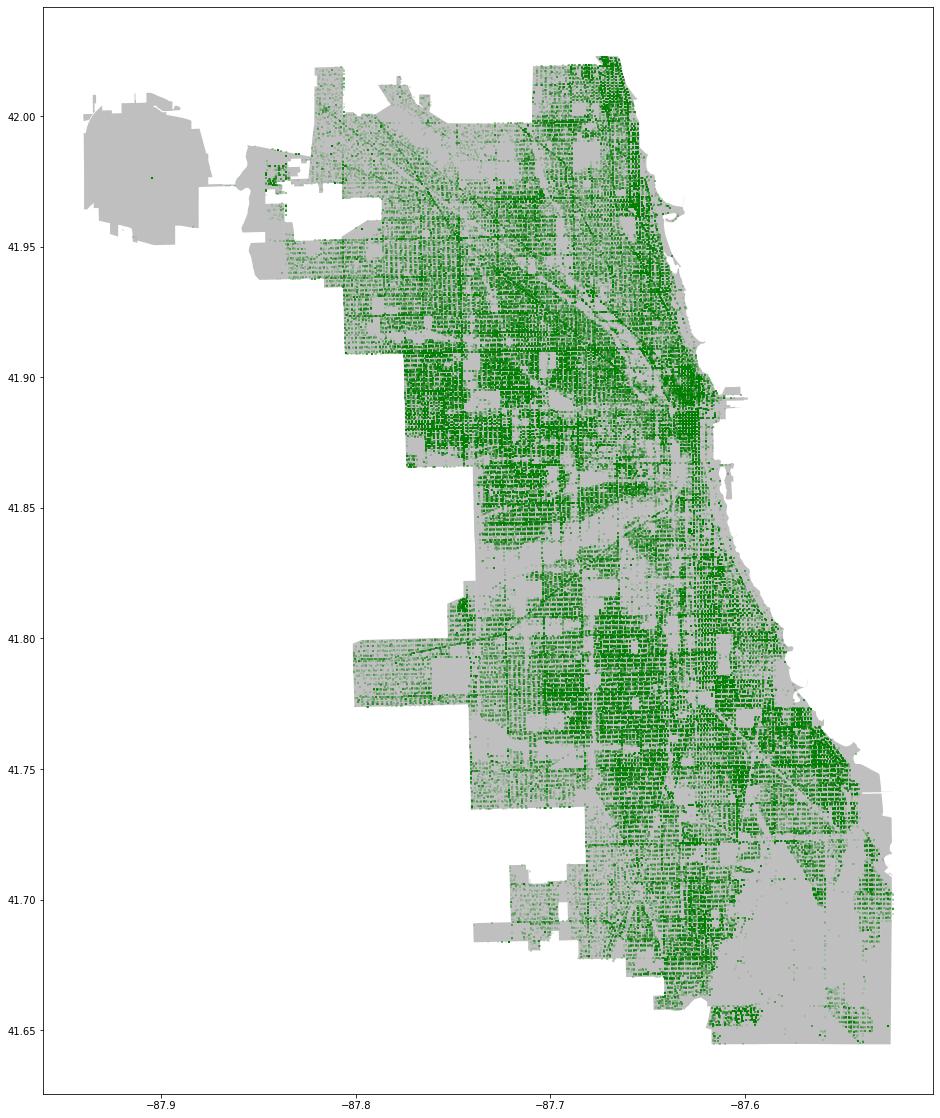

In [107]:
fig, ax = plt.subplots(figsize = (20,20))
street_map.plot(ax = ax, alpha = 0.25, color = 'k')
ax.scatter(df['Longitude'],df['Latitude'], alpha= 0.1, c='g', marker=',', s=1)

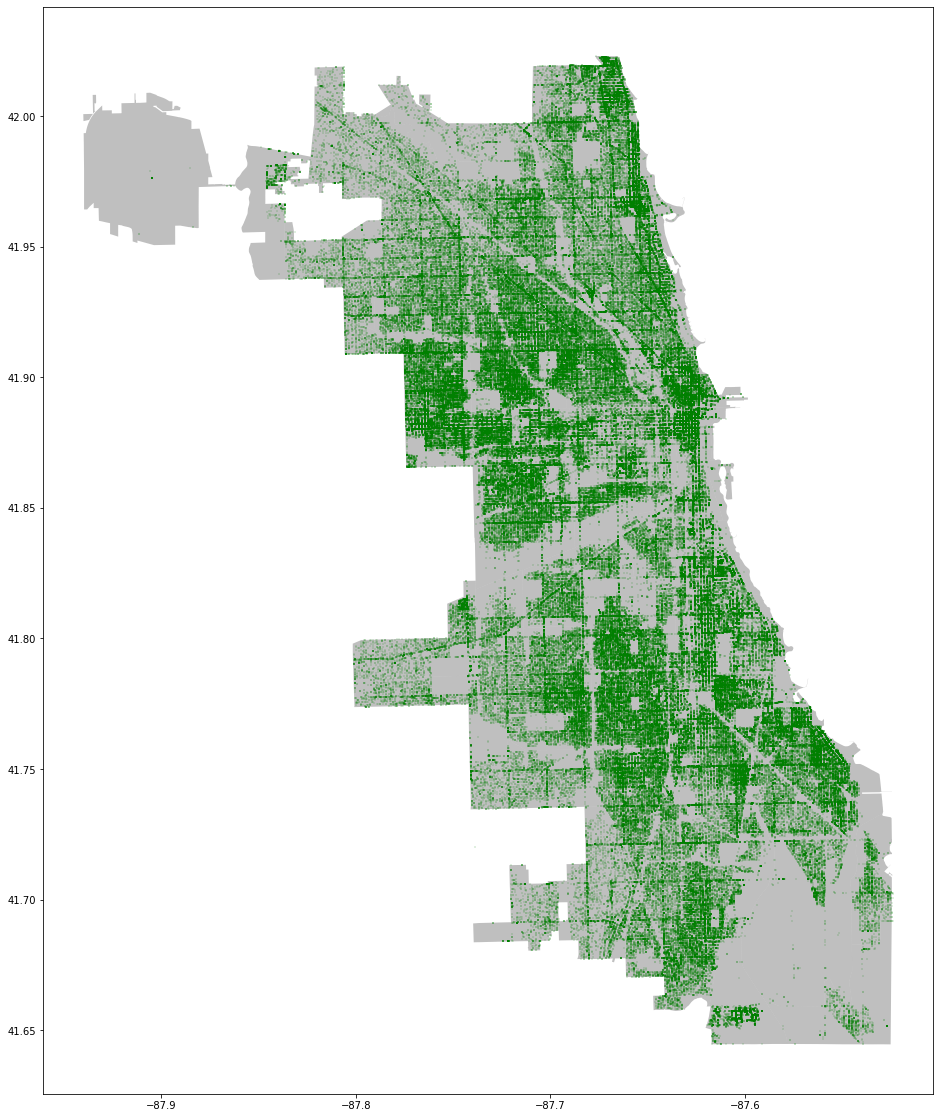

In [105]:
fig, ax = plt.subplots(figsize = (20,20))
street_map.plot(ax = ax, alpha = 0.25, color = 'k')
ax.scatter(df['Longitude'],df['Latitude'], alpha= 0.1, c='g', marker=',', s=1)

In [ ]:
B = nx.Graph()

# Add nodes with the node attribute "bipartite"

B.add_nodes_from(df['Location'], bipartite=0)

B.add_nodes_from(df[''], bipartite=1)